### In the name of love , science and polite 

Here we need to call the libraries we need. Libraries such as numpy, pandas, matplotlib
that:
    1 - numpy for working with array and matric 
    2 - pandas for working with data and analyzing
    3 - matplotlib for drawing the charts

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this step, we must read the data from the data.csv file and save it in a dataframe

In [5]:
df = pd.read_csv('data.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


At this stage, I see the information of this dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We intend to compare the number of data of both classes, which, of course, from the following comparison, it results that the number of data of the two classes are not in balance.

In [4]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

For convenience, we store the names of our dataset columns except the class column in a variable called columns_name.

In [6]:
columns_name = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

In order to balance the number of classes, they should be balanced with different methods. Here, we used the oversampling method, which creates more data from the class with less data to increase the balance.

To use this method, the unbalanced-learn library must be installed on your system, otherwise install it by running the command below.

In [ ]:
!pip install imbalanced-learn

In [7]:
from imblearn.over_sampling import RandomOverSampler

from collections import Counter

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df[columns_name], df['Class'])



print(sorted(Counter(y_resampled).items()))

[(0, 284315), (1, 284315)]


In [8]:
df_new = pd.DataFrame()
df_new[columns_name] = X_resampled
df_new['Class'] = y_resampled 
print(df_new.shape)
df_new.head()


(568630, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    568630 non-null  float64
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

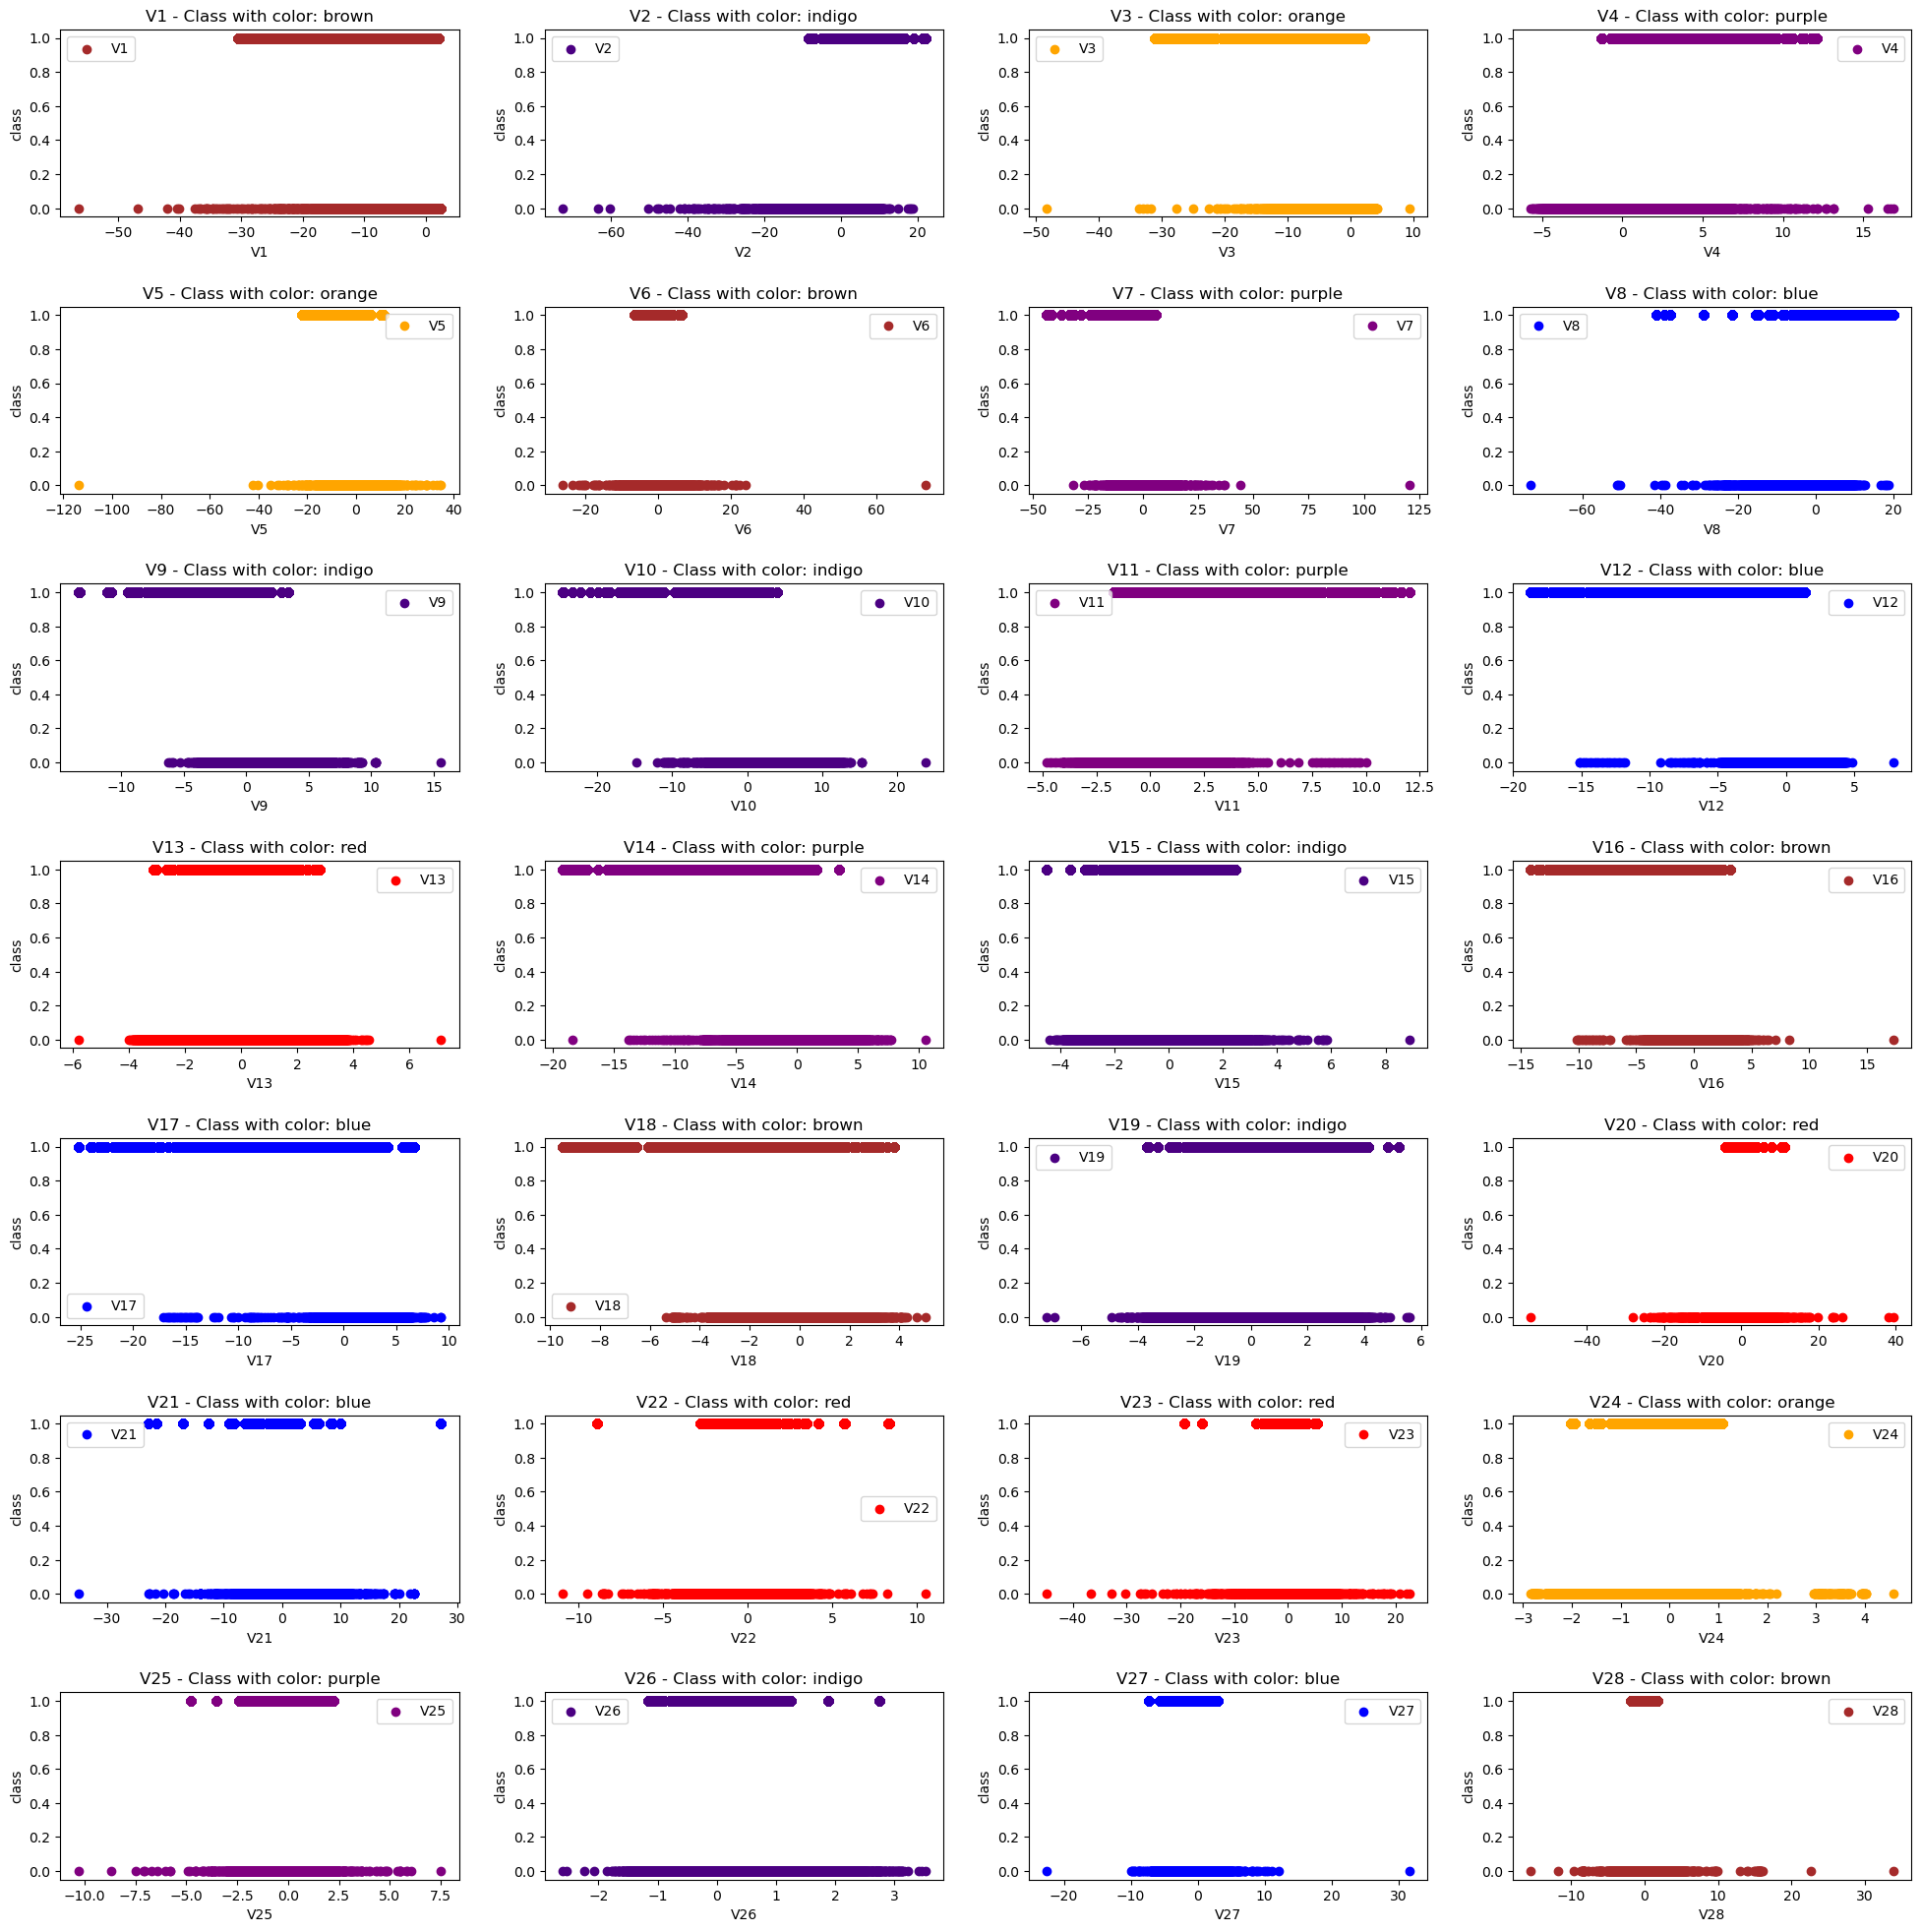

In [ ]:
import random
color = ["blue", 'purple', 'orange', 'red', 'brown', 'indigo']


fig = plt.figure(figsize=(20, 20))
# givin 
# fig.tight_layout(pad= 2)



for i in range(1, 29):
    plt.subplot(7, 4, i)
    plt.tight_layout(pad= 2)
    c = random.choice(color)
    plt.scatter(df_new[f'V{i}'], df_new['Class'], color= c, label= f'V{i}')
    plt.xlabel(f'V{i}')
    plt.ylabel('class')
    plt.title(f'V{i} - Class with color: {c}')
    plt.legend()


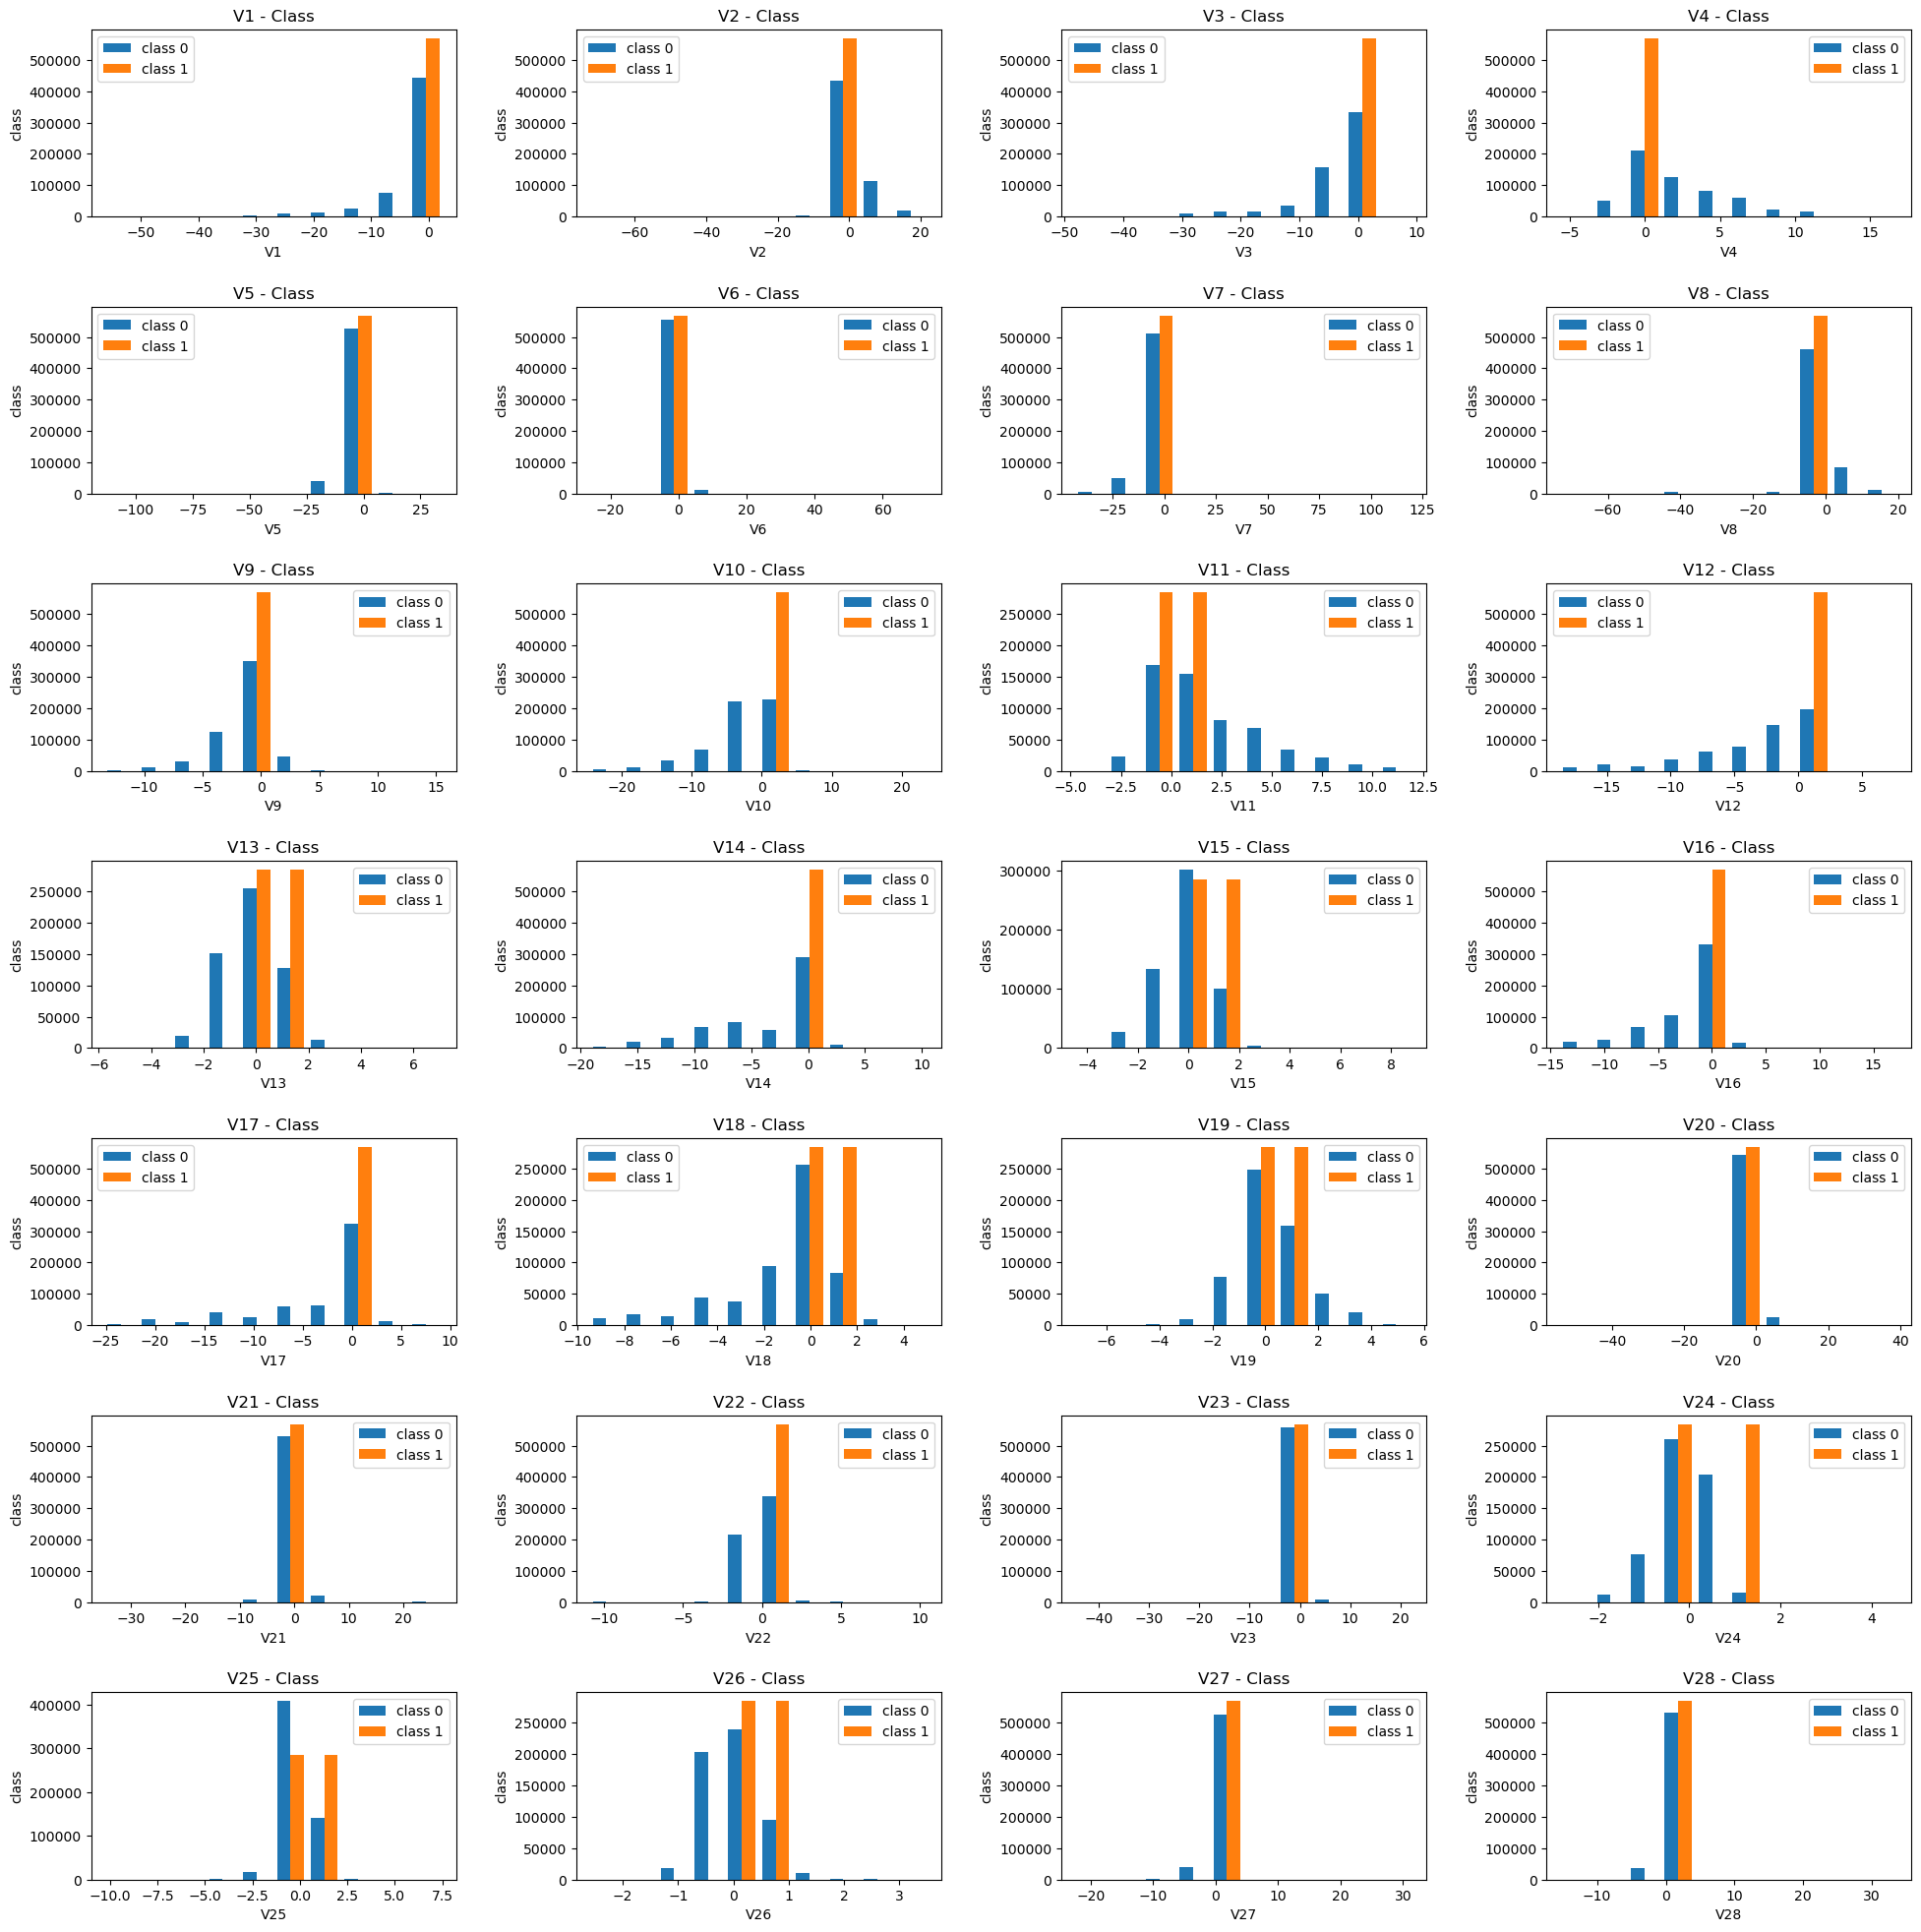

In [17]:
import random
color = ["blue", 'purple', 'orange', 'red', 'beige', 'brown', 'indigo']


fig = plt.figure(figsize=(20, 20))
# givin 
# fig.tight_layout(pad= 2)



for i in range(1, 29):
    plt.subplot(7, 4, i)
    plt.tight_layout(pad= 2)
    plt.hist([df_new[f'V{i}'], df_new['Class']], label= ['class 0', 'class 1'])
    plt.xlabel(f'V{i}')
    plt.ylabel('class')
    plt.title(f'V{i} - Class')
    plt.legend()

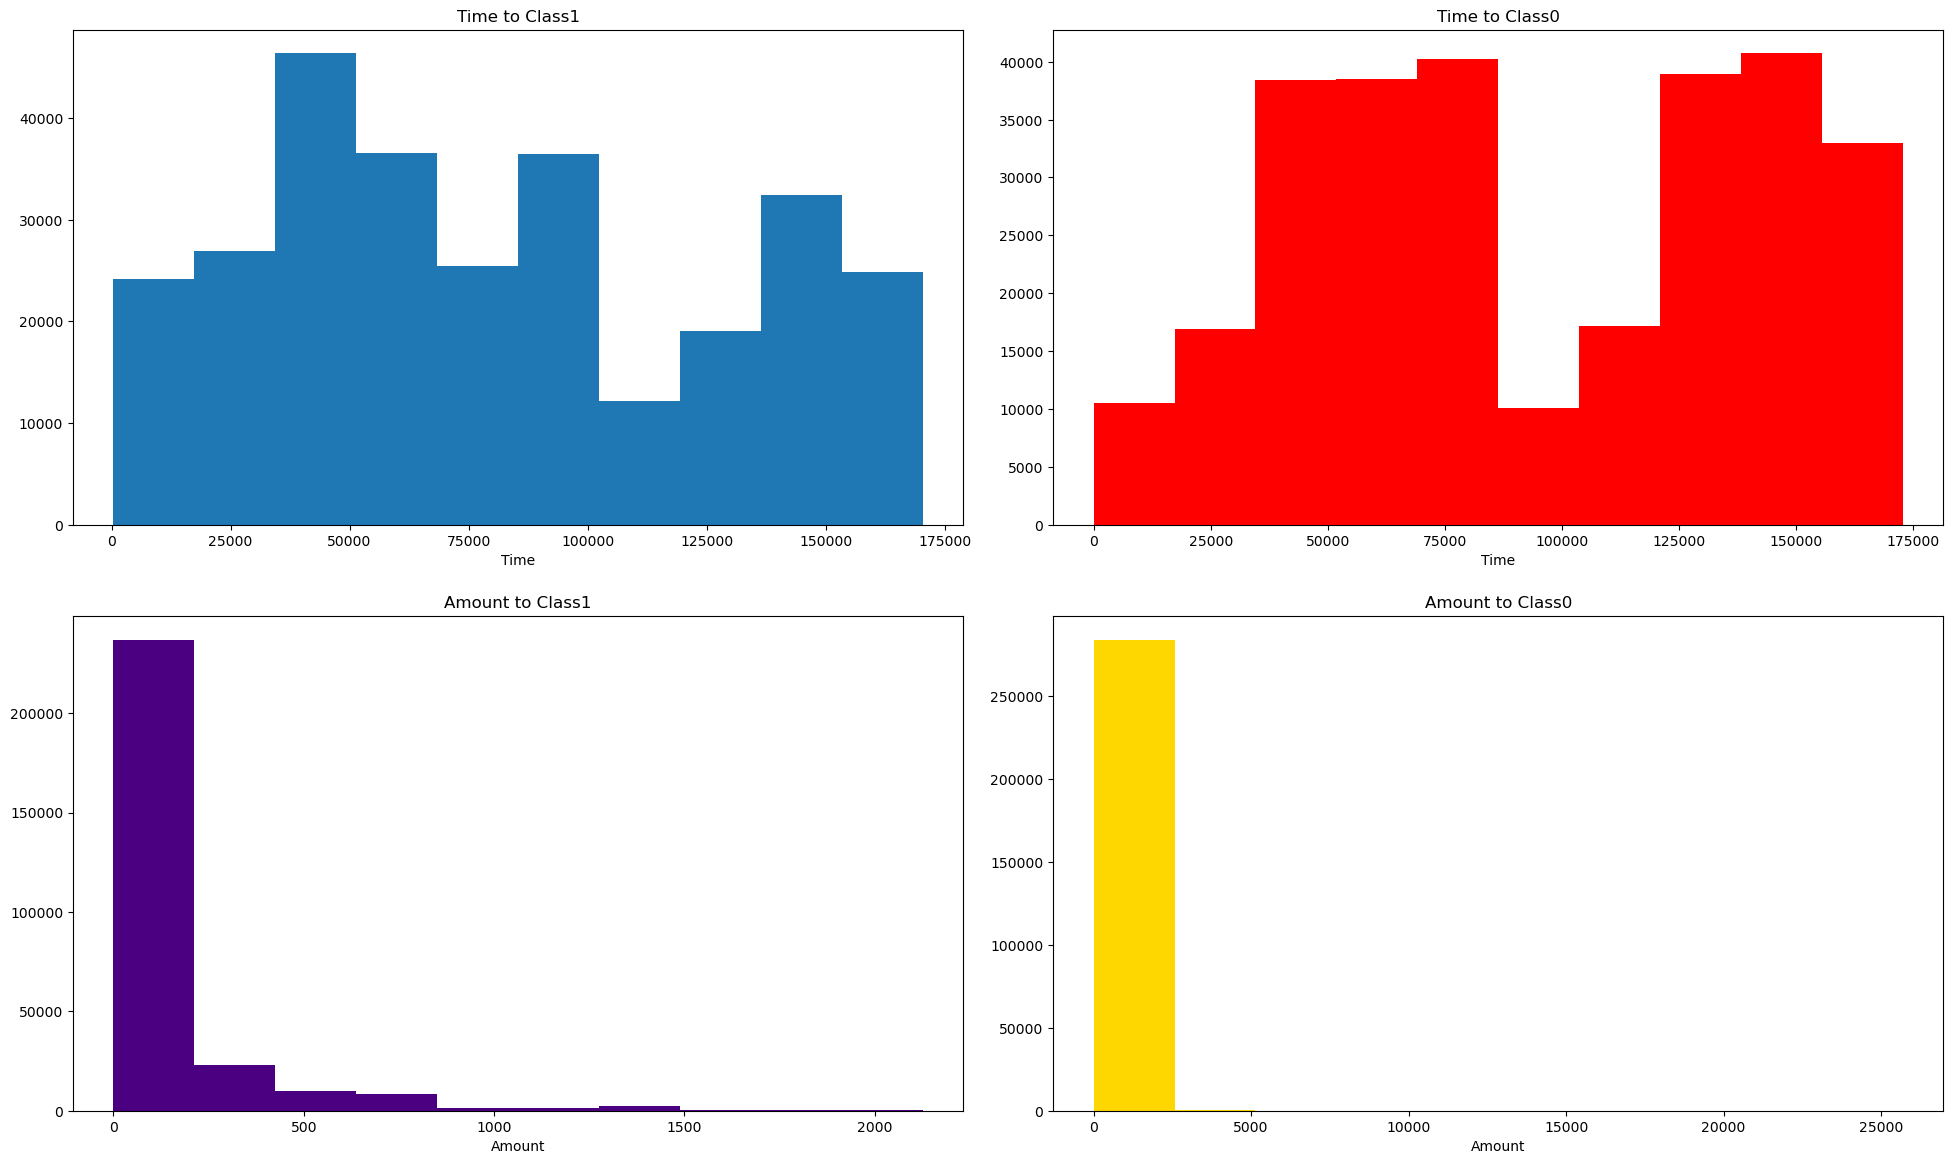

In [19]:
class1 = df_new[df_new['Class'] == 1]

class0 = df_new[df_new['Class'] == 0]


plt.figure(figsize=(20,12))

# ----------------
plt.subplot(2, 2, 1)
plt.tight_layout(pad= 2)
plt.hist(class1['Time'], bins=10)
plt.xlabel('Time')
plt.title('Time to Class1')
# ---------------------
plt.subplot(2, 2, 2)
plt.tight_layout(pad= 2)
plt.hist(class0['Time'], color='red', bins=10)
plt.xlabel('Time')
plt.title('Time to Class0')




# plt.figure(figsize=(10,6))
# ----------------
plt.subplot(2, 2, 3)
plt.tight_layout(pad= 2)
plt.hist(class1['Amount'], color='indigo', bins=10)
plt.xlabel('Amount')
plt.title('Amount to Class1')
# ---------------------
plt.subplot(2, 2, 4)
plt.tight_layout(pad= 2)
plt.hist(class0['Amount'], color='gold', bins=10)
plt.xlabel('Amount')
plt.title('Amount to Class0')
plt.show();

In [20]:
na_features = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in na_features:
    print(feature,'\t\t', np.round(df[feature].isnull().mean(),3), '%')

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Noramalize

In [22]:

correlation_matrix = df_new[columns_name].corr()
correlation_matrix

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.242859,-0.216652,0.149216,-0.212447,0.283451,0.109152,0.218341,-0.137121,0.159396,...,-0.044100,-0.059715,0.126592,0.056189,-0.007986,-0.190479,-0.049630,-0.137989,0.009515,0.008568
V1,0.242859,1.000000,-0.789868,0.878770,-0.615138,0.858312,0.310749,0.879978,-0.070470,0.657594,...,-0.293545,0.018310,-0.039725,-0.049062,-0.068610,-0.075435,0.057562,0.194255,0.175603,-0.037744
V2,-0.216652,-0.789868,1.000000,-0.852096,0.670921,-0.788067,-0.269830,-0.842596,-0.030557,-0.696487,...,0.305722,0.039849,-0.004684,0.148861,-0.004942,0.105857,-0.005652,-0.162414,-0.001013,-0.243079
V3,0.149216,0.878770,-0.852096,1.000000,-0.770439,0.851750,0.451277,0.885483,-0.162481,0.764895,...,-0.340916,0.031557,-0.066188,-0.033954,0.014018,-0.083932,-0.011378,0.106924,0.124894,-0.010230
V4,-0.212447,-0.615138,0.670921,-0.770439,1.000000,-0.578341,-0.424792,-0.708335,0.097971,-0.788272,...,0.285484,-0.024023,0.117213,0.023319,-0.077377,-0.025483,0.142890,-0.013231,-0.067023,0.007118
V5,0.283451,0.858312,-0.788067,0.851750,-0.578341,1.000000,0.278816,0.831981,-0.195494,0.658707,...,-0.307719,0.046831,-0.096651,-0.087247,-0.133555,-0.083481,0.061239,0.188457,0.163655,-0.119978
V6,0.109152,0.310749,-0.269830,0.451277,-0.424792,0.278816,1.000000,0.279687,-0.569371,0.362804,...,-0.105575,0.023304,-0.002097,0.315774,-0.023038,-0.130310,-0.039792,-0.160388,-0.031095,0.175495
V7,0.218341,0.879978,-0.842596,0.885483,-0.708335,0.831981,0.279687,1.000000,0.097673,0.762292,...,-0.372266,0.043117,-0.119119,-0.093364,-0.042530,0.052857,0.026378,0.237261,0.143345,0.135376
V8,-0.137121,-0.070470,-0.030557,-0.162481,0.097971,-0.195494,-0.569371,0.097673,1.000000,-0.070100,...,-0.038084,-0.115834,0.037189,-0.415919,0.073807,0.230379,0.048470,0.286253,-0.014171,0.017473
V9,0.159396,0.657594,-0.696487,0.764895,-0.788272,0.658707,0.362804,0.762292,-0.070100,1.000000,...,-0.381432,0.163950,-0.242989,-0.056103,0.013797,-0.006826,-0.122874,0.130332,0.133001,0.025715


In [9]:
# transform the dataframe to numpy matric (df all feature columns)
df_x = np.asanyarray(df_new[columns_name])
print(f'one sample of our df_x : \n', df_x[0:1, :])
print(f'\nshape of our df_x : ', df_x.shape)



# transform the dataframe to numpy matric (df target column)
df_y = np.asanyarray(df_new['Class'])
print(f'\none sample of our df_y : ', df_y[0])
print(f'\nshape of our df_y : ', df_y.shape)


one sample of our df_x : 
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02  2.53634674e+00
   1.37815522e+00 -3.38320770e-01  4.62387778e-01  2.39598554e-01
   9.86979013e-02  3.63786970e-01  9.07941720e-02 -5.51599533e-01
  -6.17800856e-01 -9.91389847e-01 -3.11169354e-01  1.46817697e+00
  -4.70400525e-01  2.07971242e-01  2.57905802e-02  4.03992960e-01
   2.51412098e-01 -1.83067779e-02  2.77837576e-01 -1.10473910e-01
   6.69280749e-02  1.28539358e-01 -1.89114844e-01  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]]

shape of our df_x :  (568630, 30)

one sample of our df_y :  0

shape of our df_y :  (568630,)


train and test split


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size=0.7, random_state=7)

print('size of x train : ', x_train.shape, '  size of y train : ', y_train.shape)
print('size of x test : ', x_test.shape, '  size of y test : ', y_test.shape)


size of x train :  (398041, 30)   size of y train :  (398041,)
size of x test :  (170589, 30)   size of y test :  (170589,)


normalize

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


### Feature Selection

working with PCA

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca_train = pca.fit_transform(x_train, y_train)
x_pca_test = pca.fit_transform(x_test, y_test)
print(x_pca_train.shape)
print(x_pca_test.shape)

(398041, 10)
(170589, 10)


SelectKBest Feature with mutual_info_classif

In [14]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# X, y = load_digits(return_X_y=True)
selector = SelectKBest(mutual_info_classif, k=10)
x_selectkbest_train = selector.fit_transform(x_train, y_train)
x_selectkbest_test = selector.fit_transform(x_test, y_test)
print(x_selectkbest_train.shape)
print(x_selectkbest_test.shape)

(398041, 10)
(170589, 10)


## Logistic Regression

trining model

In [28]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_selectkbest_train, y_train)

lr_model_pca = LogisticRegression()
lr_model_pca.fit(x_pca_train, y_train)

LogisticRegression()

accuracy between train and test

In [29]:
from sklearn.metrics import accuracy_score

temp_predict_1 = lr_model.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = lr_model.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))

print('--------------------------------------------------------------')

temp_predict_3 = lr_model_pca.predict(x_pca_train)
print('accuray of train with pca: ', accuracy_score(y_train, temp_predict_3))

temp_predict_4 = lr_model_pca.predict(x_pca_test)
print('accuray of train with pca: ', accuracy_score(y_test, temp_predict_4))

accuray of train with select k best:  0.9397072160908048
accuray of test with select k best:  0.9388119984289726
--------------------------------------------------------------
accuray of train with pca:  0.9234626583693639
accuray of train with pca:  0.895245297176254


confusion matrix

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = lr_model.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = lr_model.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9364443416101416
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[83253  1999]
 [ 8439 76898]]
------------------------------
Accuracy Score: 0.9388119984289726
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85252
           1       0.97      0.90      0.94     85337

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589

------------------------------
AUC:  0.9802917376964285
------------------------------
Precision: 0.9413133928811848
------------------------------
Recall: 0.9388307938463317
------------------------------


In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# pca feature selection
y_prediction_pca = lr_model_pca.predict(x_pca_test)

print('Feature Selection PCA')


# F1-score
print(f'\n\nf1_score for reall y and prediction y In PCA is : {f1_score(y_test, y_prediction_pca)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In PCA is : \n{confusion_matrix(y_test, y_prediction_pca)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction_pca)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction_pca)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = lr_model_pca.predict_proba(x_pca_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction_pca, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction_pca, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection PCA


f1_score for reall y and prediction y In PCA is : 0.8894237909014405
------------------------------
confusion matrix for reall y and prediction y In PCA is : 
[[80850  4402]
 [13468 71869]]
------------------------------
Accuracy Score: 0.895245297176254
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     85252
           1       0.94      0.84      0.89     85337

    accuracy                           0.90    170589
   macro avg       0.90      0.90      0.89    170589
weighted avg       0.90      0.90      0.89    170589

------------------------------
AUC:  0.9437844756778376
------------------------------
Precision: 0.8997456097652401
------------------------------
Recall: 0.895271752065683
------------------------------


Saving the train

In [33]:
from joblib import dump
dump(lr_model, 'models_trained\Logitic_regression.pkl')
dump(lr_model_pca, 'models_trained\Logitic_regression_pca.pkl')


['models_trained\\Logitic_regression_pca.pkl']

loading the train

In [10]:
from joblib import load
lr_model = load('models_trained\Logitic_regression.pkl')
lr_model_pca = load('models_trained\Logitic_regression_pca.pkl')


ROC Chart

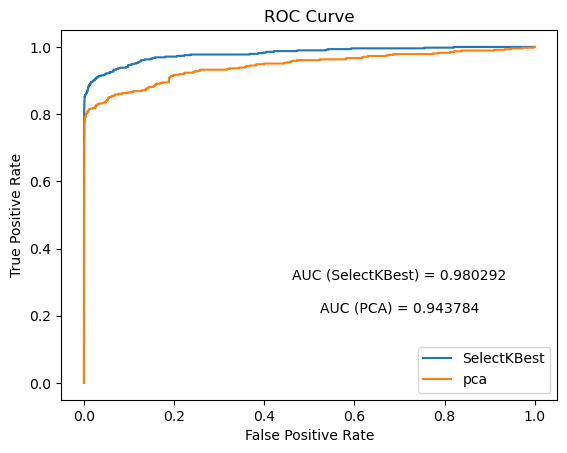

In [34]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =lr_model.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')


# pca
y_prob =lr_model_pca.predict_proba(x_pca_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='pca')
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


## Naive Bayse

training model

In [35]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_selectkbest_train ,y_train)

nb_model_pca = GaussianNB()
nb_model_pca.fit(x_pca_train, y_train)

GaussianNB()

accuracy between train and test

In [36]:
from sklearn.metrics import accuracy_score

temp_predict_1 = nb_model.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = nb_model.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))

print('--------------------------------------------------------------')

temp_predict_3 = nb_model_pca.predict(x_pca_train)
print('accuray of train with pca: ', accuracy_score(y_train, temp_predict_3))

temp_predict_4 = nb_model_pca.predict(x_pca_test)
print('accuray of train with pca: ', accuracy_score(y_test, temp_predict_4))

accuray of train with select k best:  0.9211136541210578
accuray of test with select k best:  0.9203993223478654
--------------------------------------------------------------
accuray of train with pca:  0.9056177629942644
accuray of train with pca:  0.9003628604423497


prediction

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = nb_model.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = nb_model.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9147962929265676
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[84114  1138]
 [12441 72896]]
------------------------------
Accuracy Score: 0.9203993223478654
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     85252
           1       0.98      0.85      0.91     85337

    accuracy                           0.92    170589
   macro avg       0.93      0.92      0.92    170589
weighted avg       0.93      0.92      0.92    170589

------------------------------
AUC:  0.9637984184860353
------------------------------
Precision: 0.927889920744777
------------------------------
Recall: 0.9204323175402371
------------------------------


In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# pca feature selection
y_prediction_pca = nb_model_pca.predict(x_pca_test)

print('Feature Selection PCA')


# F1-score
print(f'\n\nf1_score for reall y and prediction y In PCA is : {f1_score(y_test, y_prediction_pca)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In PCA is : \n{confusion_matrix(y_test, y_prediction_pca)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction_pca)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction_pca)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = nb_model_pca.predict_proba(x_pca_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction_pca, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction_pca, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection PCA


f1_score for reall y and prediction y In PCA is : 0.8943649279379502
------------------------------
confusion matrix for reall y and prediction y In PCA is : 
[[81639  3613]
 [13384 71953]]
------------------------------
Accuracy Score: 0.9003628604423497
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91     85252
           1       0.95      0.84      0.89     85337

    accuracy                           0.90    170589
   macro avg       0.91      0.90      0.90    170589
weighted avg       0.91      0.90      0.90    170589

------------------------------
AUC:  0.9410649530966284
------------------------------
Precision: 0.9056686908778548
------------------------------
Recall: 0.9003913758382638
------------------------------


Saving the train

In [38]:
from joblib import dump
dump(nb_model, 'models_trained\ naive_bayse.pkl')
dump(nb_model_pca, 'models_trained\ naive_bayse_pca.pkl')


['models_trained\\ naive_bayse_pca.pkl']

loading the train

In [24]:
from joblib import load
nb_model = load('models_trained\ naive_bayse.pkl')
nb_model_pca = load('models_trained\ naive_bayse.pkl')


ROC Chart

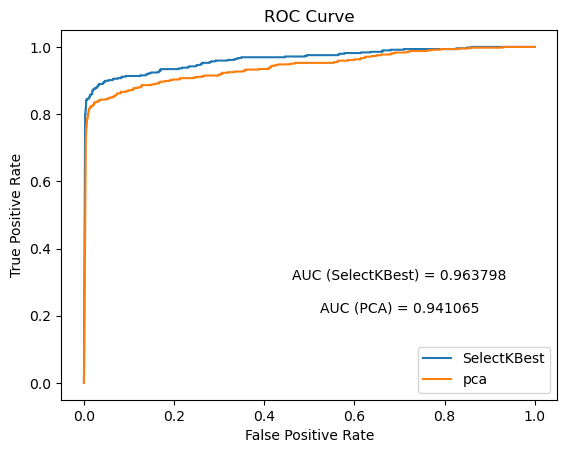

In [39]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =nb_model.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')


# pca
y_prob =nb_model_pca.predict_proba(x_pca_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='pca')
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


## SVM

training model

In [40]:
from sklearn.svm import SVC

svm_model = SVC(probability=True)
svm_model.fit(x_selectkbest_train, y_train)


SVC(probability=True)

In [45]:

svm_model_pca = SVC(probability=True)
svm_model_pca.fit(x_pca_train, y_train)

SVC(probability=True)

prediction

In [47]:
from sklearn.metrics import accuracy_score

temp_predict_1 = svm_model.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = svm_model.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))

print('--------------------------------------------------------------')

temp_predict_3 = svm_model_pca.predict(x_pca_train)
print('accuray of train with pca: ', accuracy_score(y_train, temp_predict_3))

temp_predict_4 = svm_model_pca.predict(x_pca_test)
print('accuray of train with pca: ', accuracy_score(y_test, temp_predict_4))

accuray of train with select k best:  0.9529520828256386
accuray of test with select k best:  0.952359179079542
--------------------------------------------------------------
accuray of train with pca:  0.9634585381907894
accuray of train with pca:  0.8367010768572417


In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = svm_model.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = svm_model.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9505696021604132
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[84319   933]
 [ 7194 78143]]
------------------------------
Accuracy Score: 0.952359179079542
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     85252
           1       0.99      0.92      0.95     85337

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589

------------------------------
AUC:  0.9906845746537223
------------------------------
Precision: 0.9547947211030907
------------------------------
Recall: 0.9523774550188913
------------------------------


In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# pca feature selection
y_prediction_pca = svm_model_pca.predict(x_pca_test)

print('Feature Selection PCA')


# F1-score
print(f'\n\nf1_score for reall y and prediction y In PCA is : {f1_score(y_test, y_prediction_pca)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In PCA is : \n{confusion_matrix(y_test, y_prediction_pca)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction_pca)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction_pca)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = svm_model_pca.predict_proba(x_pca_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction_pca, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction_pca, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection PCA


f1_score for reall y and prediction y In PCA is : 0.8201486225619637
------------------------------
confusion matrix for reall y and prediction y In PCA is : 
[[79216  6036]
 [21821 63516]]
------------------------------
Accuracy Score: 0.8367010768572417
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85     85252
           1       0.91      0.74      0.82     85337

    accuracy                           0.84    170589
   macro avg       0.85      0.84      0.84    170589
weighted avg       0.85      0.84      0.84    170589

------------------------------
AUC:  0.8822681821065382
------------------------------
Precision: 0.8486228119780895
------------------------------
Recall: 0.8367471427520783
------------------------------


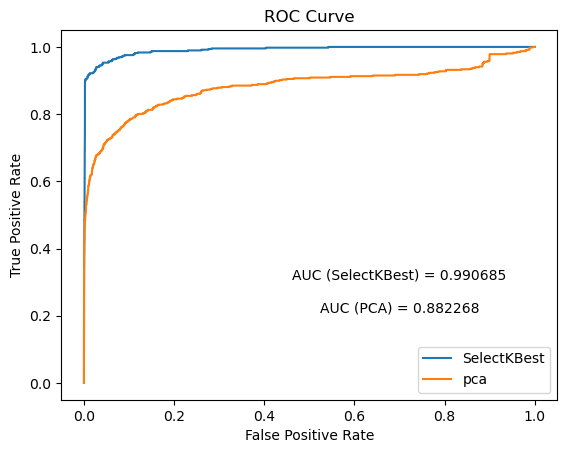

In [50]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =svm_model.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')


# pca
y_prob =svm_model_pca.predict_proba(x_pca_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='pca')
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

Saving the train

In [52]:
from joblib import dump
dump(svm_model, 'models_trained\SVM.pkl')
dump(svm_model_pca, 'models_trained\SVM_pca.pkl')


['models_trained\\SVM_pca.pkl']

loading the train

In [27]:
from joblib import load
svm_model = load('models_trained\SVM.pkl')
svm_model_pca = load('models_trained\SVM_pca.pkl')


# Decison Tree

training model

In [13]:
from sklearn.tree import DecisionTreeClassifier

dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc_model.fit(x_selectkbest_train, y_train)

dtc_model_pca = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtc_model_pca.fit(x_pca_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

prediction

In [14]:
from sklearn.metrics import accuracy_score

temp_predict_1 = dtc_model.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = dtc_model.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))

print('--------------------------------------------------------------')

temp_predict_3 = dtc_model_pca.predict(x_pca_train)
print('accuray of train with pca: ', accuracy_score(y_train, temp_predict_3))

temp_predict_4 = dtc_model_pca.predict(x_pca_test)
print('accuray of train with pca: ', accuracy_score(y_test, temp_predict_4))

accuray of train with select k best:  0.9402749967968124
accuray of test with select k best:  0.9397557873016431
--------------------------------------------------------------
accuray of train with pca:  0.9334214314605782
accuray of train with pca:  0.9022152659315665


Saving the train

In [15]:
from joblib import dump
dump(dtc_model, 'models_trained\DecisionTree.pkl')
dump(dtc_model_pca, 'models_trained\DecisionTree_pca.pkl')


['models_trained\\DecisionTree_pca.pkl']

loading the train

In [29]:
from joblib import load
dtc_model = load('models_trained\DecisionTree.pkl')
dtc_model_pca = load('models_trained\DecisionTree_pca.pkl')


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = dtc_model.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = dtc_model.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9368078656590686
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[84135  1117]
 [ 9160 76177]]
------------------------------
Accuracy Score: 0.9397557873016431
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     85252
           1       0.99      0.89      0.94     85337

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589

------------------------------
AUC:  0.9787577345327021
------------------------------
Precision: 0.9436827509330479
------------------------------
Recall: 0.9397792651592372
------------------------------


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = dtc_model_pca.predict(x_selectkbest_test)


print('Feature Selection with PCA\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = dtc_model_pca.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with PCA


f1_score for reall y and prediction y In SelectKBest is : 0.5343270487855225
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[  184 85068]
 [23214 62123]]
------------------------------
Accuracy Score: 0.3652462937235109
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.00      0.00     85252
           1       0.42      0.73      0.53     85337

    accuracy                           0.37    170589
   macro avg       0.21      0.37      0.27    170589
weighted avg       0.22      0.37      0.27    170589

------------------------------
AUC:  0.2151326907142924
------------------------------
Precision: 0.2149604875560105
------------------------------
Recall: 0.3650654666563542
------------------------------


ROC chart

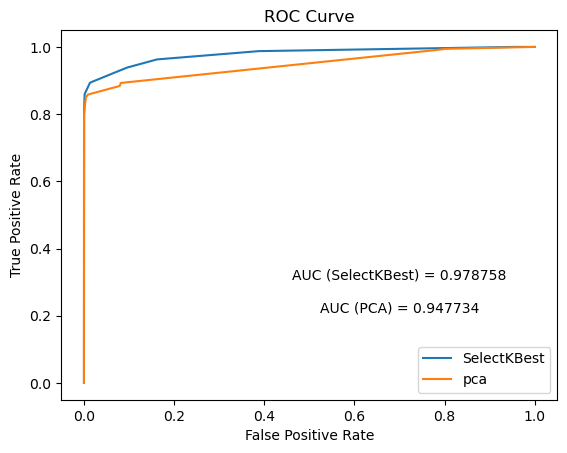

In [20]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =dtc_model.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')


# pca
y_prob =dtc_model_pca.predict_proba(x_pca_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label='pca')
plt.text(0.7,0.2, f"AUC (PCA) = {format(auc, '4f')}",  ha='center', va='bottom')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

# Ensemble Learning

## Voting Classifire

In [21]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

log_reg_model = LogisticRegression(random_state=1)
decision_tree_model = DecisionTreeClassifier(random_state=1)
svm_model = SVC(random_state=1, probability= True)
np_model = GaussianNB()

el_voting_model = VotingClassifier(estimators=[('lr', log_reg_model), ('dt', decision_tree_model), ('svc', svm_model), ('naive_bayse', np_model)], voting='soft')
# eclf = VotingClassifier(estimators=[('lr', log_reg_model), ('dt', decision_tree_model), ('svc', svm_model)], voting='hard')
el_voting_model.fit(x_selectkbest_train, y_train)


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('dt', DecisionTreeClassifier(random_state=1)),
                             ('svc', SVC(probability=True, random_state=1)),
                             ('naive_bayse', GaussianNB())],
                 voting='soft')

save the model

In [22]:
from joblib import dump
dump(el_voting_model, 'models_trained\ Ensemble_learning_voting_(soft).pkl')

['models_trained\\ Ensemble_learning_voting_(soft).pkl']

prediction

In [14]:
from sklearn.metrics import accuracy_score

temp_predict_1 = el_voting_model.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = el_voting_model.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))



accuray of train with select k best:  0.9587705789102128
accuray of test with select k best:  0.9580805327424394


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = el_voting_model.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = el_voting_model.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9565196242361597
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[84781   471]
 [ 6680 78657]]
------------------------------
Accuracy Score: 0.9580805327424394
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     85252
           1       0.99      0.92      0.96     85337

    accuracy                           0.96    170589
   macro avg       0.96      0.96      0.96    170589
weighted avg       0.96      0.96      0.96    170589

------------------------------
AUC:  0.9987862054951102
------------------------------
Precision: 0.9605055121074244
------------------------------
Recall: 0.958098658215363
------------------------------


accuracy with cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(el_voting_model, x_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
#  Error beacuse of the svm probability is True

load model

In [13]:
from joblib import load
el_voting_model = load('models_trained\ Ensemble_learning_voting_(soft).pkl')

ROC Chart

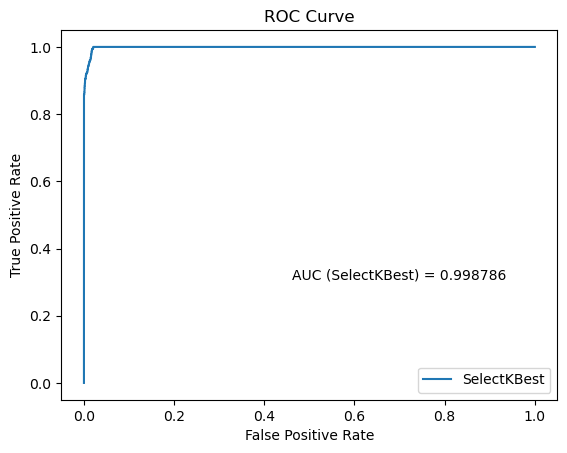

In [18]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =el_voting_model.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

## Stacking Classifire

training model

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

estimators = [('lr', LogisticRegression()), ('svm', SVC(probability= True)), ('dt', DecisionTreeClassifier()), ('naive bayse', GaussianNB())]
stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking.fit(x_selectkbest_train, y_train)


StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('svm', SVC(probability=True)),
                               ('dt', DecisionTreeClassifier()),
                               ('naive bayse', GaussianNB())],
                   final_estimator=LogisticRegression())

saving model

In [20]:
from joblib import dump
dump(stacking, 'models_trained\stacking_classifire_logReg_SVM_DT_NB.pkl')

['models_trained\\stacking_classifire_logReg_SVM_DT_NB.pkl']

accuracy with cross_val_score

In [17]:
from sklearn.metrics import accuracy_score

temp_predict_1 = stacking.predict(x_selectkbest_train)
print('accuray of train with select k best: ', accuracy_score(y_train, temp_predict_1))

temp_predict_2 = stacking.predict(x_selectkbest_test)
print('accuray of test with select k best: ', accuracy_score(y_test, temp_predict_2))

accuray of train with select k best:  1.0
accuray of test with select k best:  0.9997068978656303


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


y_prediction = stacking.predict(x_selectkbest_test)


print('Feature Selection with SelectKBest\n\n')
# F1-score
print(f'f1_score for reall y and prediction y In SelectKBest is : {f1_score(y_test, y_prediction)}')
print('-'*30)

# confusion matrix
print(f'confusion matrix for reall y and prediction y In SelectKBest is : \n{confusion_matrix(y_test, y_prediction)}')
print('-'*30)

# Accuracy Score
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy Score:", accuracy)
print('-'*30)

# Classification Report
classification_rep = classification_report(y_test, y_prediction)
print("Classification Report:")
print(classification_rep)
print('-'*30)

# ROC Curve and AUC
y_prob = stacking.predict_proba(x_selectkbest_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print("AUC: ", auc)
print('-'*30)

# Precision
precision = precision_score(y_test, y_prediction, average='macro')
print("Precision:", precision)
print('-'*30)

# Recall
recall = recall_score(y_test, y_prediction, average='macro')
print("Recall:", recall)
print('-'*30)

Feature Selection with SelectKBest


f1_score for reall y and prediction y In SelectKBest is : 0.9997071296361378
------------------------------
confusion matrix for reall y and prediction y In SelectKBest is : 
[[85202    50]
 [    0 85337]]
------------------------------
Accuracy Score: 0.9997068978656303
------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85252
           1       1.00      1.00      1.00     85337

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

------------------------------
AUC:  0.9998769815042509
------------------------------
Precision: 0.9997072153840749
------------------------------
Recall: 0.9997067517477596
------------------------------


In [30]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(stacking, x_train, y_train)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 1.00 (+/- 0.00)


ROC Chart

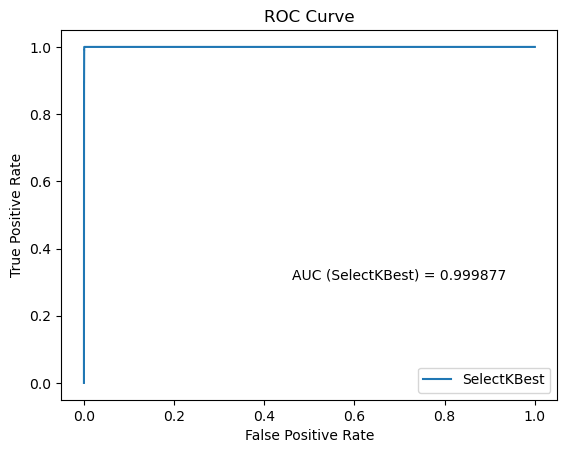

In [19]:
from sklearn.metrics import roc_curve

# SelectKBest
y_prob =stacking.predict_proba(x_selectkbest_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label= 'SelectKBest')
plt.text(0.7,0.3, f"AUC (SelectKBest) = {format(auc, '4f')}",  ha='center', va='bottom')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()
